In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import quandl

In [2]:
# Simulate rolling a dice

def dice():
    number = [1,2,3,4,5,6]
    return random.choice(number)


In [3]:
series = np.array([dice() for i in range(1000)])
print(series)

[1 4 5 3 1 3 4 1 2 4 3 1 3 5 4 6 1 6 1 6 2 6 2 3 2 1 1 5 2 1 6 4 6 2 2 1 5
 5 3 1 3 3 3 1 6 5 1 1 6 1 2 6 1 6 2 1 4 1 2 3 6 3 5 6 1 2 1 5 4 2 4 6 5 1
 2 4 2 1 6 5 3 3 3 3 1 4 1 3 3 6 5 3 2 6 1 2 1 1 3 2 1 5 6 4 1 1 3 3 4 1 4
 6 1 4 5 1 4 6 6 6 5 5 5 5 4 3 2 6 5 3 5 2 1 3 1 1 2 4 1 1 5 3 2 5 2 1 5 3
 1 5 6 4 2 4 4 4 2 6 4 1 2 2 5 6 5 4 6 5 6 4 1 5 2 6 6 6 1 2 4 1 3 5 1 1 1
 6 2 5 6 6 2 4 6 6 3 6 1 2 4 1 5 1 3 4 1 3 5 6 3 5 6 3 6 1 3 1 1 1 6 1 5 5
 3 6 6 1 5 5 2 5 1 2 3 4 4 6 6 1 2 2 2 6 6 1 1 4 5 5 6 5 5 2 6 2 3 2 3 4 4
 4 4 1 1 6 3 1 3 5 5 2 1 4 2 4 4 1 3 5 1 1 2 2 4 3 5 1 6 2 2 4 6 3 6 5 3 6
 4 1 6 6 6 4 2 2 1 1 4 6 4 3 6 4 1 2 3 6 1 2 2 1 4 3 4 3 3 3 6 3 1 3 1 2 5
 1 5 6 3 5 5 1 1 2 6 2 2 2 5 6 3 4 4 3 1 2 5 1 4 6 4 5 5 1 5 3 3 2 6 2 3 5
 1 3 4 3 1 1 4 1 4 2 3 5 5 1 5 6 3 3 6 4 5 2 1 6 1 3 5 6 1 1 1 6 4 4 3 3 3
 4 4 1 4 4 1 3 2 3 2 5 3 1 5 5 5 2 3 4 1 5 5 1 6 4 1 6 3 4 1 3 4 6 2 1 3 2
 5 2 1 4 3 1 5 3 2 1 2 2 3 4 3 2 2 5 2 3 4 2 5 6 4 5 3 6 5 2 2 3 4 5 6 6 2
 6 2 3 1 1 3 2 5 2 5 3 3 

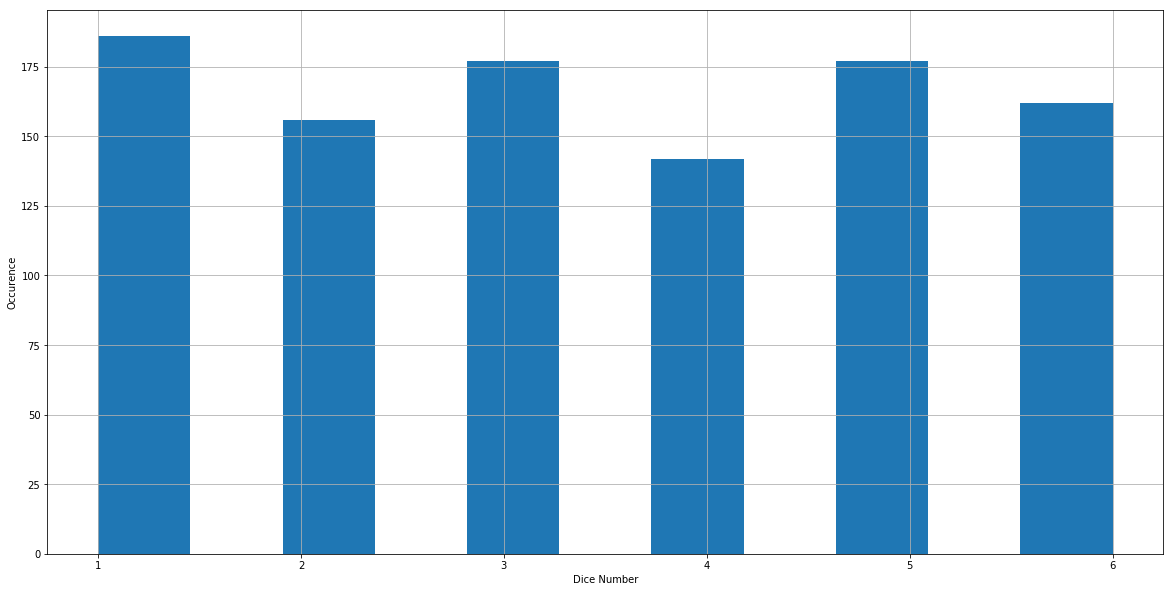

In [4]:
plt.figure(figsize=(20,10))
plt.hist(series, bins=11, align='mid')
plt.xlabel('Dice Number')
plt.ylabel('Occurence')
plt.grid()
plt.show()

In [5]:
print(len([i for i in series if i <=3])/len(series))

0.519


In [6]:
print(np.mean(series))

3.454


In [7]:
def trial():
    number = list(range(1,11))
    a = random.choice(number)
    
    if a < 7:
        return 1
    else:
        return 0

In [8]:
result = [trial() for i in range(10)]
print(result)
print(sum(result))

[1, 1, 1, 1, 0, 1, 0, 0, 0, 1]
6


In [9]:
def binomial(number):
    l = []
    for i in range(10000):
        res = [trial() for i in range(10)]
        l.append(sum(res))
    return len([x for x in l if x == number])/len(l)

In [10]:
binomial(8)

0.1249

In [11]:
prob = []
for i in range(1,11):
    prob.append(binomial(i))
    
prob_s = pd.Series(prob, index=range(1,11))
print(prob_s)

1     0.0012
2     0.0112
3     0.0409
4     0.1151
5     0.1994
6     0.2553
7     0.2143
8     0.1222
9     0.0377
10    0.0064
dtype: float64


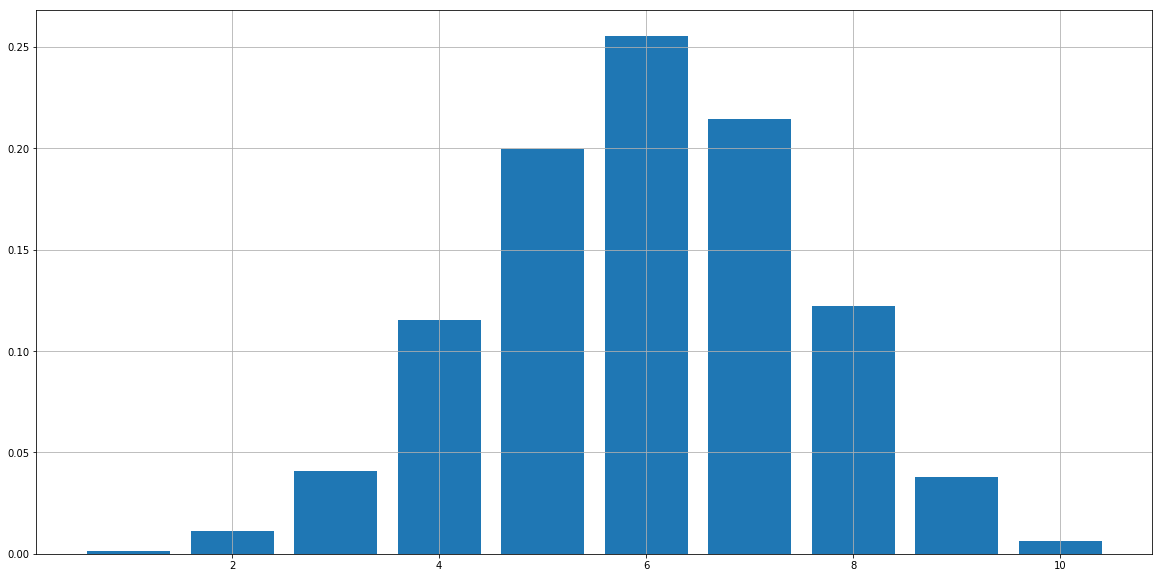

In [12]:
plt.figure(figsize = (20,10))
plt.bar(range(1,11),prob)
plt.grid()
plt.show()

<Figure size 1440x720 with 0 Axes>

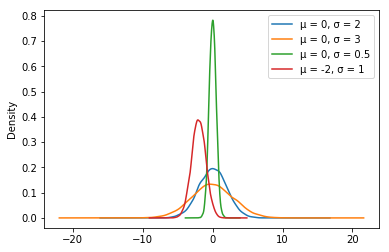

In [13]:
de_2 = pd.Series(np.random.normal(0,2,10000),name = 'μ = 0, σ = 2')
de_3 = pd.Series(np.random.normal(0,3,10000),name = 'μ = 0, σ = 3')
de_0 = pd.Series(np.random.normal(0,0.5,10000), name ='μ = 0, σ = 0.5')
mu_1 = pd.Series(np.random.normal(-2,1,10000),name ='μ = -2, σ = 1')
df = pd.concat([de_2,de_3,de_0,mu_1],axis = 1)
plt.figure(figsize=(20,10))
df.plot.density()
plt.show()